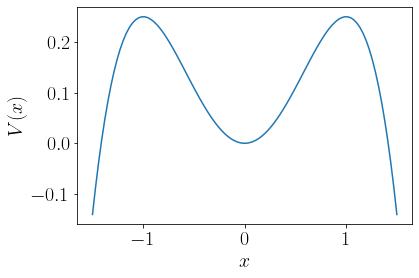

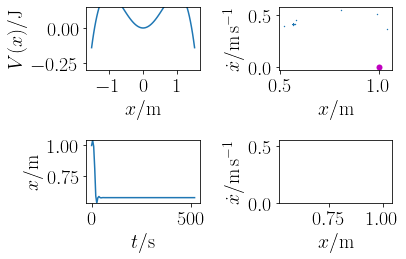

In [529]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
rc('text', usetex=True)
rc('animation', html='html5')

# The potential and its first derivative, as callables.
V = lambda x, alpha, beta: 0.25 * alpha * x**4 + 0.5 * beta * x**2
dVdx = lambda x, alpha, beta: alpha * x**3 + beta * x

# The potential energy function on a grid of x-points.
xgrid = np.linspace(-1.5, 1.5, 100)
Vgrid = V(xgrid, alpha, beta)

plt.plot(xgrid, Vgrid)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')

def deriv(X, t, gamma, delta, omega, alpha, beta):
    """Return the derivatives dx/dt and d2x/dt2."""

    x, xdot = X
    xdotdot = -dVdx(x, alpha, beta) -delta * xdot + gamma * np.cos(omega*t)
    return xdot, xdotdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega, alpha, beta):
    """Solve the Duffing equation for parameters gamma, delta, omega.

    Find the numerical solution to the Duffing equation using a suitable
    time grid: tmax is the maximum time (s) to integrate to; t_trans is
    the initial time period of transient behaviour until the solution
    settles down (if it does) to some kind of periodic motion (these data
    points are dropped) and dt_per_period is the number of time samples
    (of duration dt) to include per period of the driving motion (frequency
    omega).

    Returns the time grid, t (after t_trans), position, x, and velocity,
    xdot, dt, and step, the number of array points per period of the driving
    motion.

    """
    # Time point spacings and the time grid

    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=(gamma, delta, omega, alpha, beta))
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step

def H(x, p):
    return p**2 / 2 + V(x)


font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }
lblsize = 25

# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 1.0, 0.0
tmax, t_trans = 18000, 300
omega = 1.2
alpha, beta = -1, 1
gamma, delta = 0.2, 0.3
dt_per_period = 100

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega, alpha, beta)
x, xdot = X.T

# The animation
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1 = ax[0,0]
ax1.plot(xgrid, Vgrid)
ax1.set_ylim(-0.3, 0.15)
ln1, = ax1.plot([], [], 'mo')
ax1.set_xlabel(r'$x / \mathrm{m}$')
ax1.set_ylabel(r'$V(x) / \mathrm{J}$')

# Position as a function of time
ax2 = ax[1,0]
ax2.set_xlabel(r'$t / \mathrm{s}$')
ax2.set_ylabel(r'$x / \mathrm{m}$')
ln2, = ax2.plot(t[:100], x[:100])
ax2.set_ylim(np.min(x), np.max(x))

# Phase space plot
ax3 = ax[1,1]
ax3.set_xlabel(r'$x / \mathrm{m}$')
ax3.set_ylabel(r'$\dot{x} / \mathrm{m\,s^{-1}}$')
ln3, = ax3.plot([], [])
ax3.set_xlim(np.min(x), np.max(x))
ax3.set_ylim(np.min(xdot), np.max(xdot))

# Poincaré section plot
ax4 = ax[0,1]
ax4.set_xlabel(r'$x / \mathrm{m}$')
ax4.set_ylabel(r'$\dot{x} / \mathrm{m\,s^{-1}}$')
ax4.scatter(x[::pstep], xdot[::pstep], s=2, lw=0, color=sbs.color_palette()[0])
scat1 = ax4.scatter([x0], [v0], lw=0, c='m')
plt.tight_layout()

def animate(i):
    """Update the image for iteration i of the Matplotlib animation."""
    
    ln1.set_data(x[i], V(x[i]))
    ln2.set_data(t[:i+1], x[:i+1])
    ax2.set_xlim(t_trans, t[i])
    ln3.set_data(x[:i+1], xdot[:i+1])
    if not i % pstep:
        scat1.set_offsets(X[i])
    return

anim = animation.FuncAnimation(fig, animate, frames=len(x), interval=1)

plt.show()

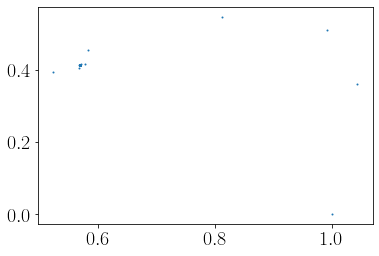

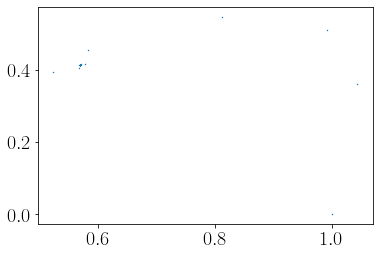

In [530]:
plt.scatter(x, xdot, s=1)
#print(len(x))
plt.show()
plt.scatter(x[::pstep], xdot[::pstep], s=2, lw=0)

In [494]:
print(len(x[::pstep]))
x0, v0 = x0 - 1e-3, v0

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega, alpha, beta)
xtv, xdottv = X.T

3381


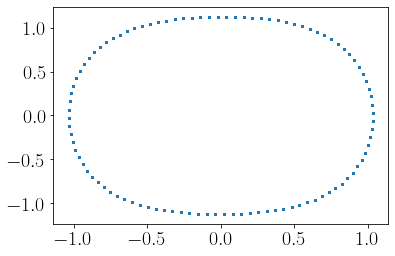

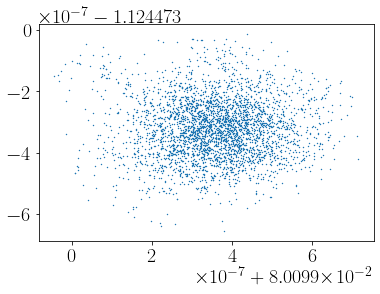

In [495]:
plt.scatter(xtv, xdottv, s=1)
#print(len(x))
plt.show()
plt.scatter(x[::pstep], xdot[::pstep], s=2, lw=0)

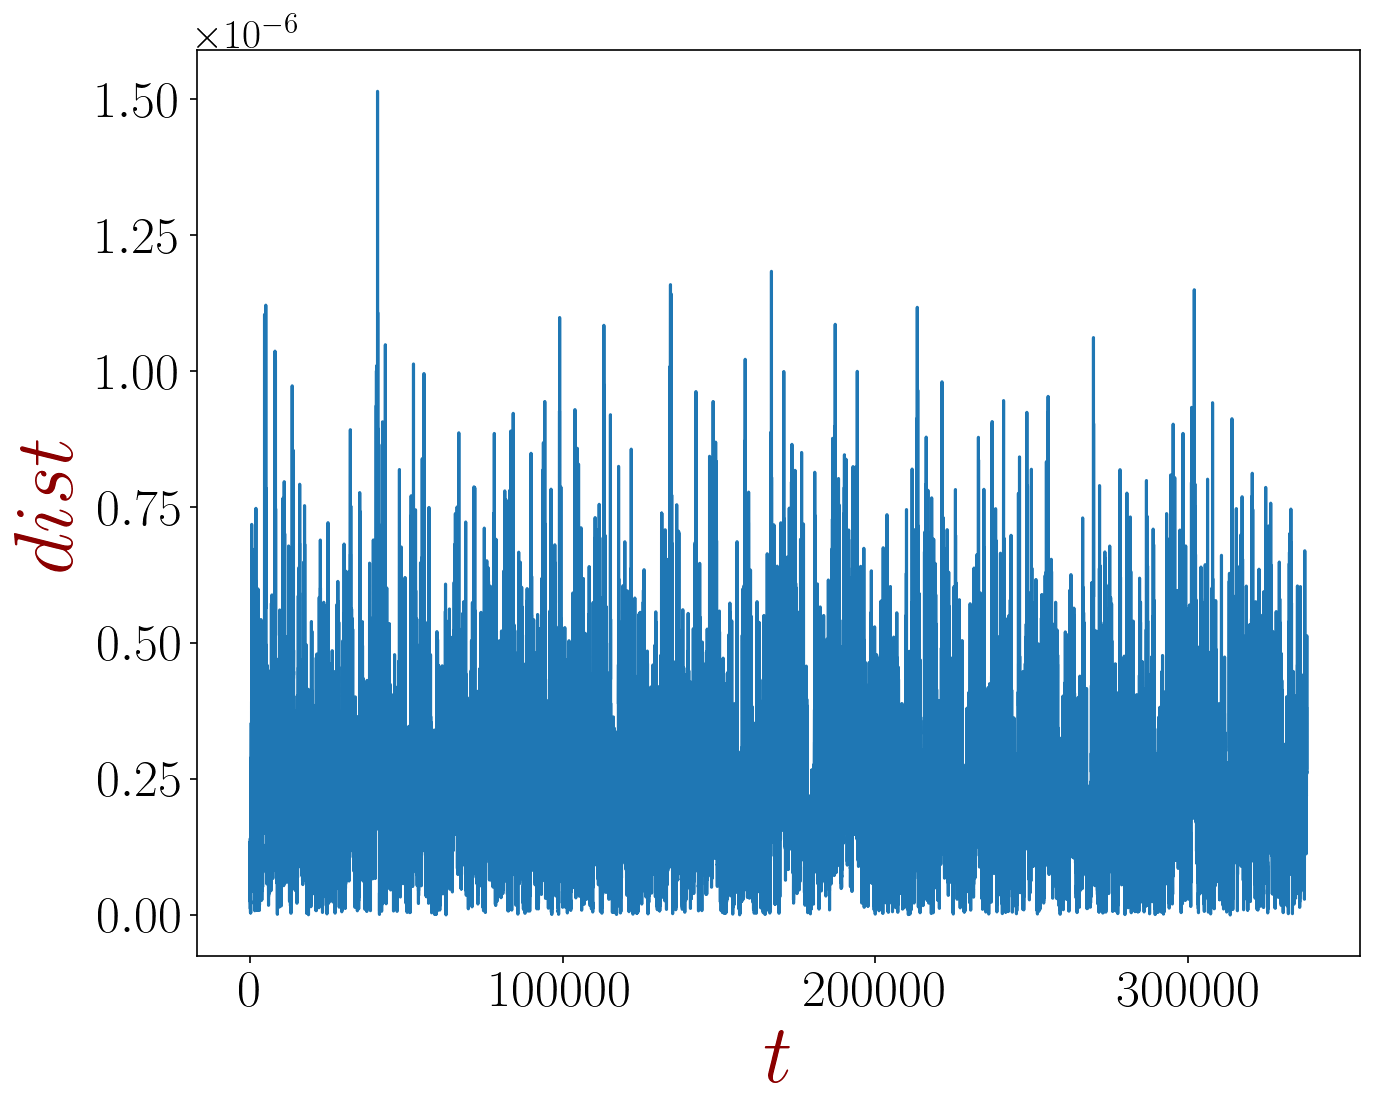

<Figure size 1500x1200 with 0 Axes>

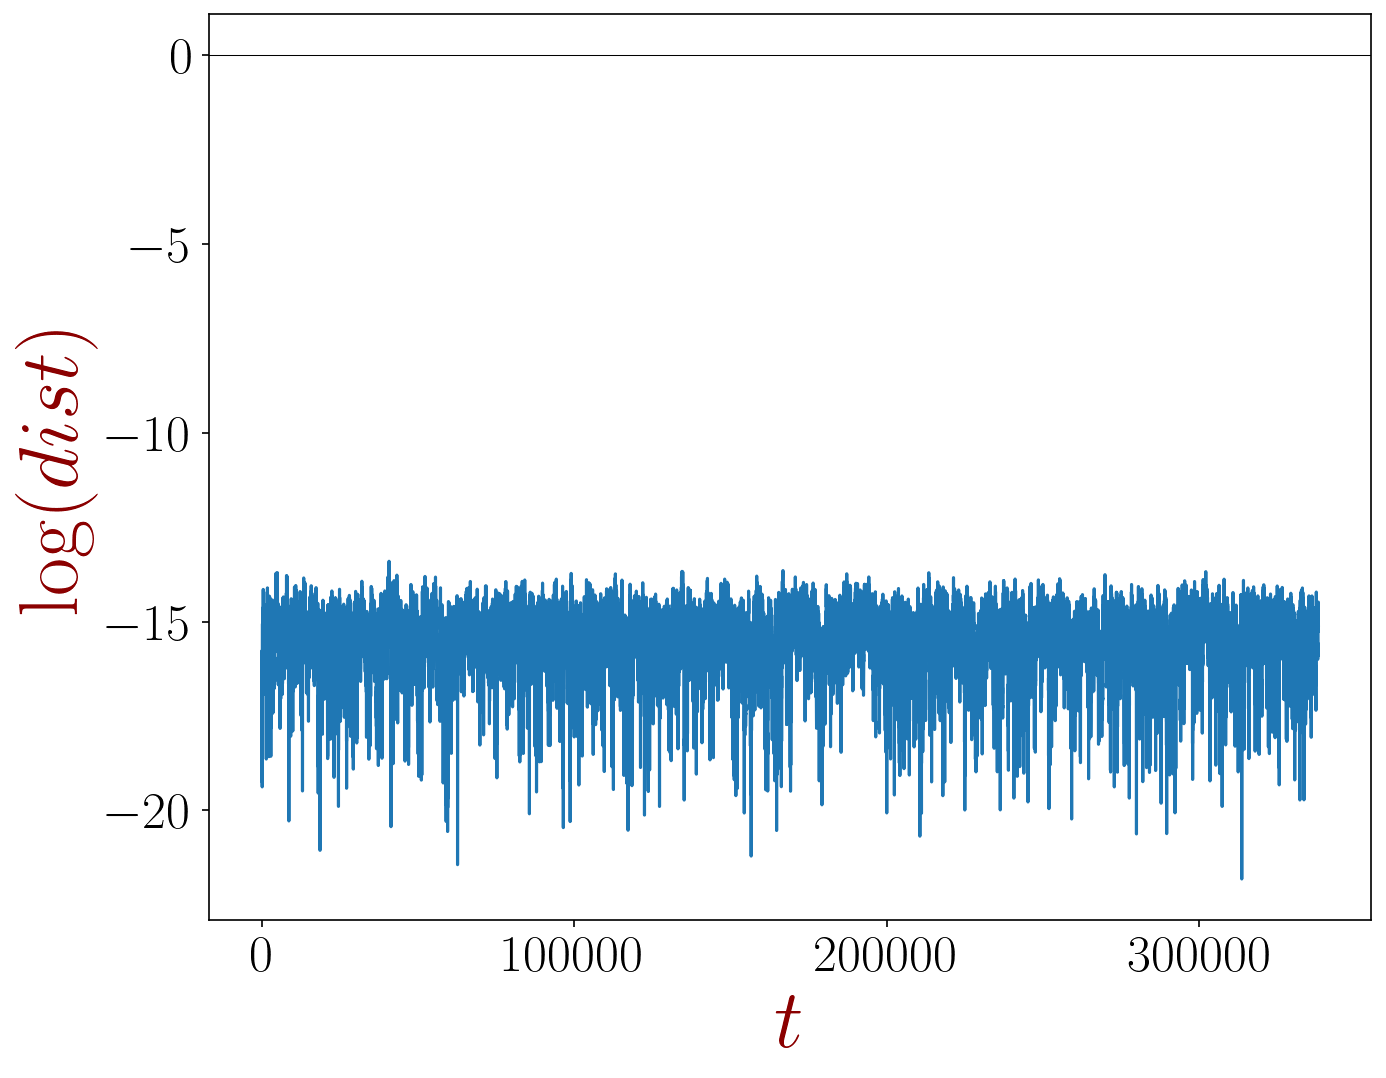

In [496]:
dx = [xt - xtvt for xt, xtvt in zip(x, xtv)]
dp = [xdott - xdottvt for xdott, xdottvt in zip(xdot, xdottv)]

Dist = [np.sqrt(dx[i]**2 + dp[i]**2) for i in range(len(dx))]

LogDist = np.log(Dist)

plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$dist$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(Dist)
plt.show()
plt.close()

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$\log(dist)$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(LogDist)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

In [497]:
print(LogDist[-1]/len(x))

-4.481914380169191e-05


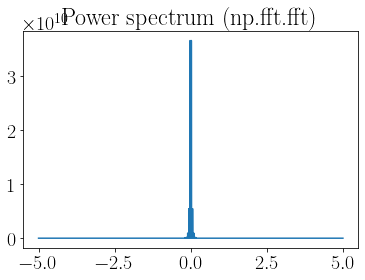

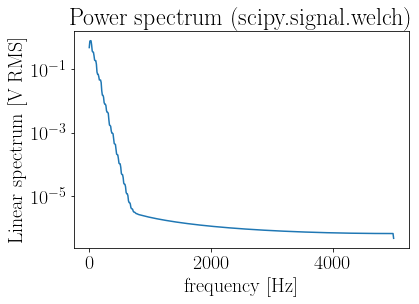

In [485]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(tmax) / fs
x = np.asarray(x)


# np.fft.fft
time_step = 1 / 10
freqs = np.fft.fftfreq(x.size, time_step)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()